# Lab - Drzewa

## Zadania

1. Wczytaj zbiór `Carseats.csv`. Usuń kolumnę `Sales` i zastąp ją zmienną kategoryczną `SalesHigh`, która przyjmie wartość `Yes`, jeśli `Sales >= 8` i `No` w przeciwnym przypadku. Użyj drzew decyzyjnych do predykcji wartości `SalesHigh` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór treningowy i testowy.
    - Stwórz model [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.
2. Wczytaj zbiór `boston.csv`. Przewiduj wartość `medv` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór testowy i treningowy.
    - Stwórz model [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split #podział na zbiory testowy itd.
from sklearn.model_selection import cross_val_score #Cross validacja
from sklearn.tree import DecisionTreeClassifier #Dla drzew decyzyjnych
from sklearn.model_selection import GridSearchCV  # do modelowania Decision Tree

from sklearn.ensemble import RandomForestClassifier #Do random forestów
from sklearn.datasets import make_classification

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

1. Wczytaj zbiór `Carseats.csv`. Usuń kolumnę `Sales` i zastąp ją zmienną kategoryczną `SalesHigh`, która przyjmie wartość `Yes`, jeśli `Sales >= 8` i `No` w przeciwnym przypadku. Użyj drzew decyzyjnych do predykcji wartości `SalesHigh` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór treningowy i testowy.
    - Stwórz model [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.

In [26]:
data = pd.read_csv("Carseats.csv")
data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [27]:
data.Sales = data.Sales >= 8
data.Sales 
data.rename(columns={'Sales' : 'SalesHigh'}, inplace=True)
data

,SalesHigh,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,True,138,73,11,276,120,Bad,42,17,Yes,Yes
1,True,111,48,16,260,83,Good,65,10,Yes,Yes
2,True,113,35,10,269,80,Medium,59,12,Yes,Yes
3,False,117,100,4,466,97,Medium,55,14,Yes,Yes
4,False,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,True,138,108,17,203,128,Good,33,14,Yes,Yes
396,False,139,23,3,37,120,Medium,55,11,No,Yes
397,False,162,26,12,368,159,Medium,40,18,Yes,Yes
398,False,100,79,7,284,95,Bad,50,12,Yes,Yes


In [28]:

# Wybierz kolumny zawierające dane kategoryczne
kolumny_kategoryczne = ['ShelveLoc', 'Urban','US']

# Zastosuj kodowanie one-hot
data_encoded = pd.get_dummies(data, columns=kolumny_kategoryczne)

X = data_encoded.drop(columns="SalesHigh")
y = data_encoded["SalesHigh"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
336,138,35,6,60,143,28,18,True,False,False,False,True,True,False
64,100,67,12,184,104,32,16,False,False,True,True,False,False,True
55,143,81,5,60,154,61,18,False,False,True,False,True,False,True
106,102,33,0,217,139,70,18,False,False,True,True,False,True,False
300,116,78,1,158,99,45,11,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,34,12,False,False,True,False,True,False,True
192,108,26,0,408,93,56,14,False,False,True,True,False,True,False
117,145,53,0,507,119,41,12,False,False,True,False,True,True,False
47,126,98,0,173,108,55,16,True,False,False,False,True,True,False


In [29]:
Drzewo = DecisionTreeClassifier(random_state=0)
Drzewo.fit(X_train,y_train)
precision_scores = cross_val_score(Drzewo, X_train, y_train, cv=10)
print("Średnia precyzja:", precision_scores.mean())

Średnia precyzja: 0.709375


Poniżej trochę odklejki od zadania, chciałem zrozumieć dokumentację, ale już to zostawię dla siebie na przyszłość

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

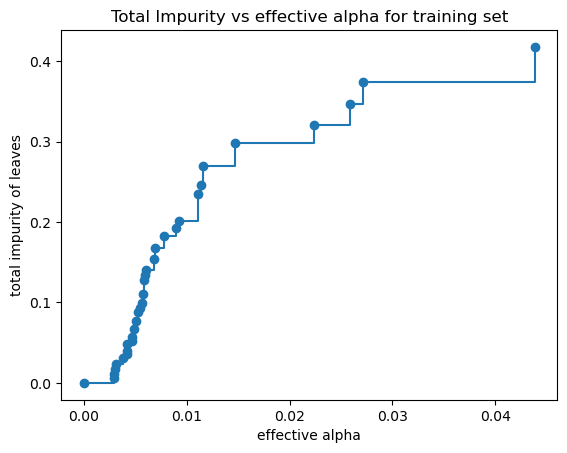

In [30]:
path = Drzewo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [31]:
clfs = []
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0)
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train2, y_train2)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.060968520220588185


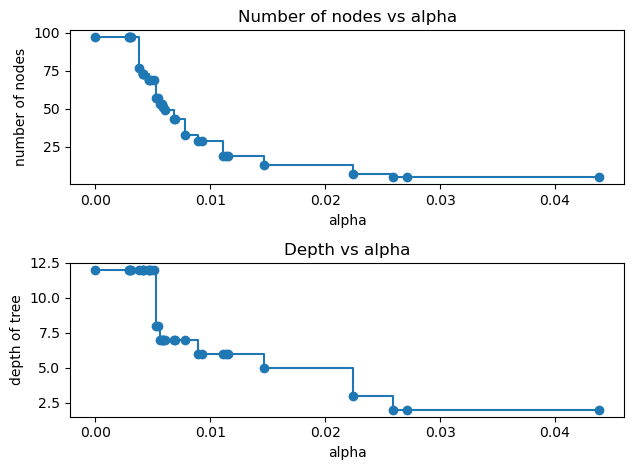

In [32]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

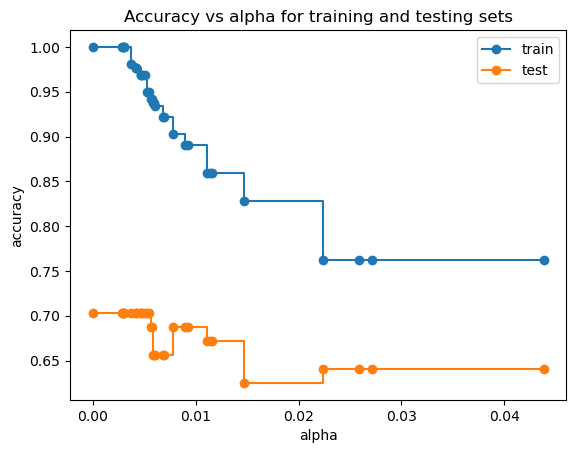

In [33]:
train_scores = [clf.score(X_train2, y_train2) for clf in clfs]
test_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validating sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Wracając do zadania

In [48]:
param_grid = {'ccp_alpha': ccp_alphas}
clf = GridSearchCV(Drzewo, param_grid, cv = 10, scoring='accuracy', refit=True) #Ważna funkcja :)

clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00288462, 0.00294118, 0.00302083, 0.00307692,
       0.00375   , 0.00416667, 0.00416667, 0.00416667, 0.0046875 ,
       0.0046875 , 0.00482143, 0.00509454, 0.00528846, 0.00546875,
       0.00565188, 0.00575   , 0.00586538, 0.00590278, 0.00606061,
       0.00684389, 0.00693375, 0.0078174 , 0.00894886, 0.00923077,
       0.01112803, 0.01139204, 0.01154576, 0.01465858, 0.02238067,
       0.02586814, 0.02713877, 0.04384204])},
             scoring='accuracy')

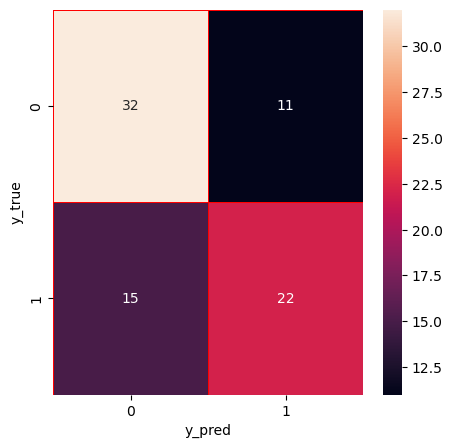

In [49]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

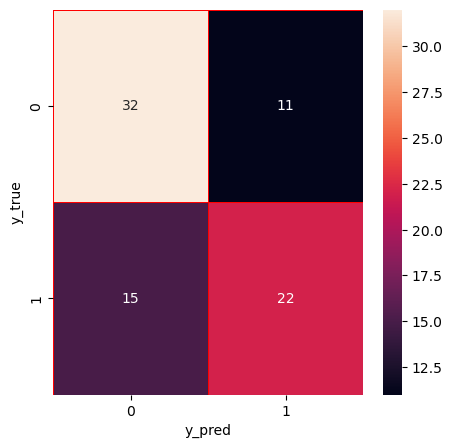

In [39]:
y_pred = Drzewo.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
print("Głębokość dla początkowego drzewa to", Drzewo.get_depth())

#print("Głębokość dla wybranego przez GridSearch drzewa to", clf.get_depth()) tego nie umiem zrobić

print("Ilość liści dla początkowego drzewa to", Drzewo.get_n_leaves())

#print("Ilość liści dla wybranego przez GridSerach drzewa to", clf.get_n_leaves()) tego nie umiem zrobić

Głębokość dla początkowego drzewa to 10
Ilość liści dla początkowego drzewa to 53


2. Wczytaj zbiór `boston.csv`. Przewiduj wartość `medv` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór testowy i treningowy.
    - Stwórz model [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Użyj walidacji krzyżowej do ewaluacji modelu.
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Następnie użyj [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), aby znaleźć najlepszą. 
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.

In [34]:
data2 = pd.read_csv("boston.csv")
data2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
